In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib
import re

In [4]:
def add_sticker(img_path, sticker_path, detector_hog, landmark_predictor, results_path):
    img_bgr = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    img_bgr = cv2.resize(img_bgr, (640, 360))
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_rgba = cv2.cvtColor(img_bgr, cv2.COLOR_BGRA2RGBA)
    dlib_rect = detector_hog(img_rgb, 1)[0]
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    x = list_points[30][0]
    y = list_points[30][1] + dlib_rect.height() // 20
    w = dlib_rect.width()
    h = dlib_rect.height()
    refined_x = x - w // 2
    refined_y = y - h // 2
    img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)
    img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGRA2RGBA)
    img_sticker = cv2.resize(img_sticker, (w,h))
    sticker_area = img_rgba[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    for row in img_sticker:
        for pixel in row:
            if pixel[-1] < 100:
                pixel[:2] = 255
                pixel[3] = 0
    img_rgba[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==[255,255,255,0], sticker_area, cv2.addWeighted(img_sticker, 0.5, sticker_area, 0.5, 0))
    plt.imshow(img_rgba)
    cv2.imwrite(results_path + re.search(r'photo[0-9]\.',image_path).group()+'jpg', cv2.cvtColor(img_rgba, cv2.COLOR_RGBA2BGRA))

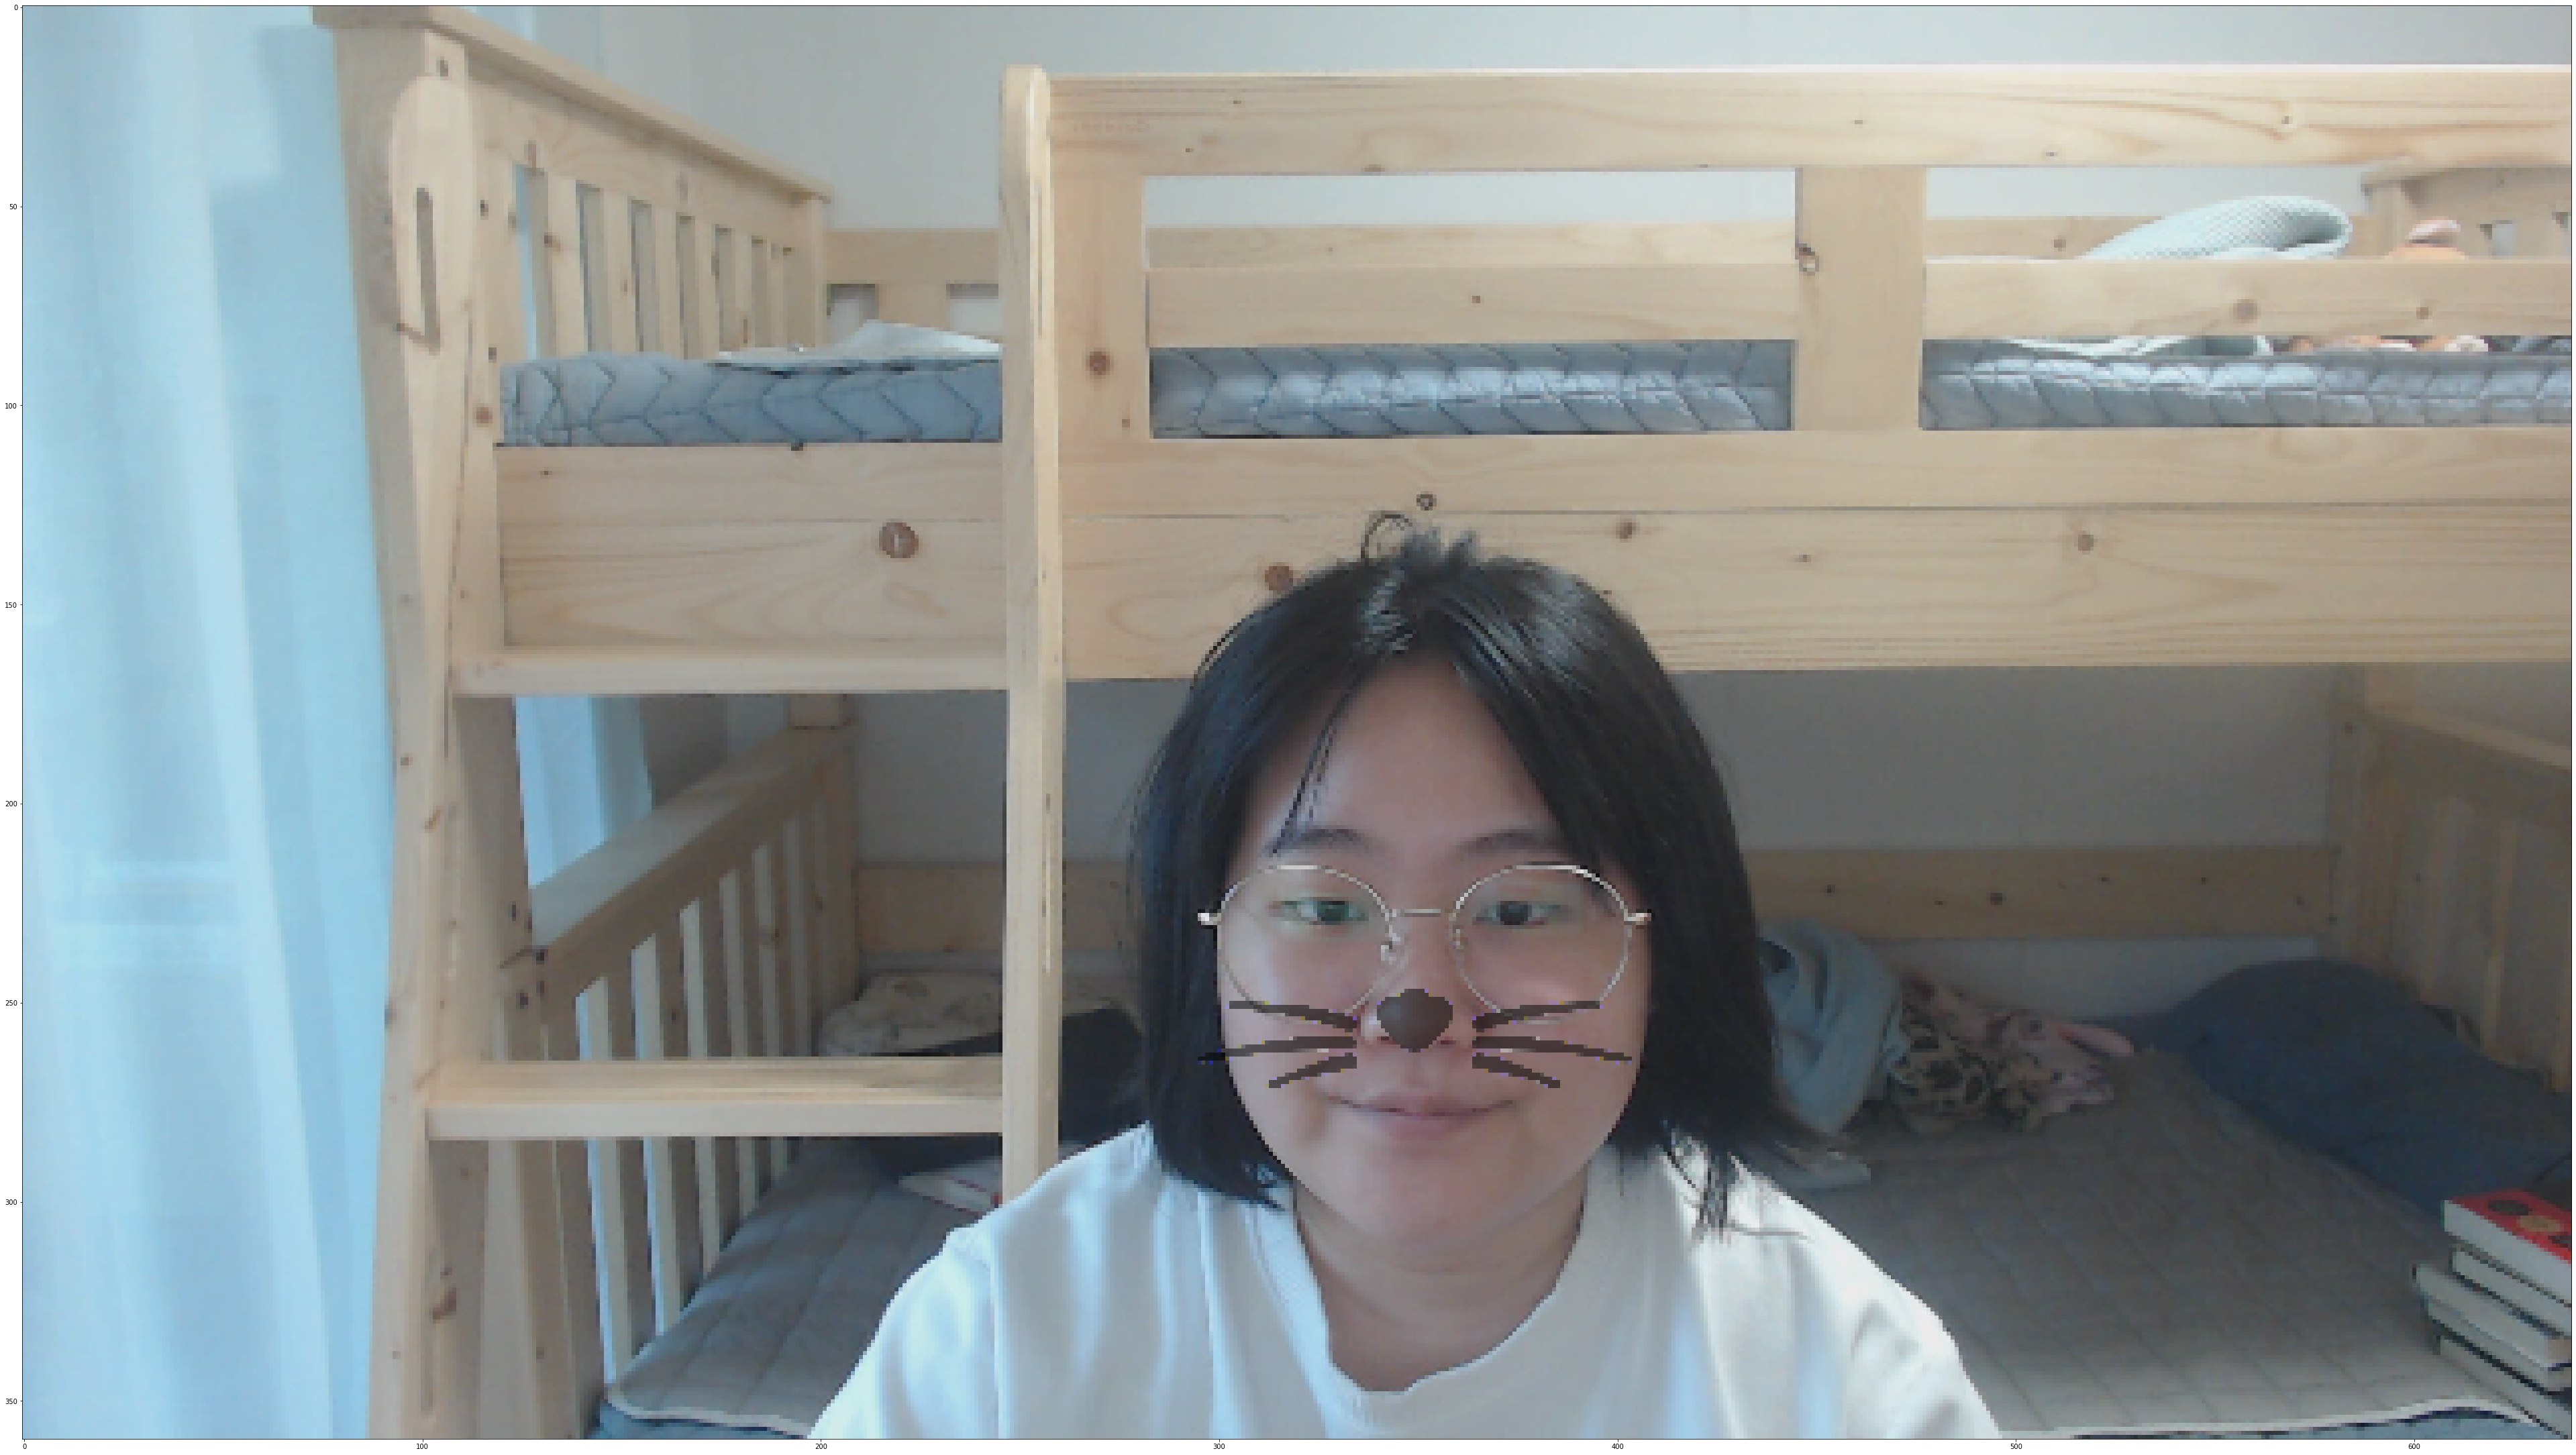

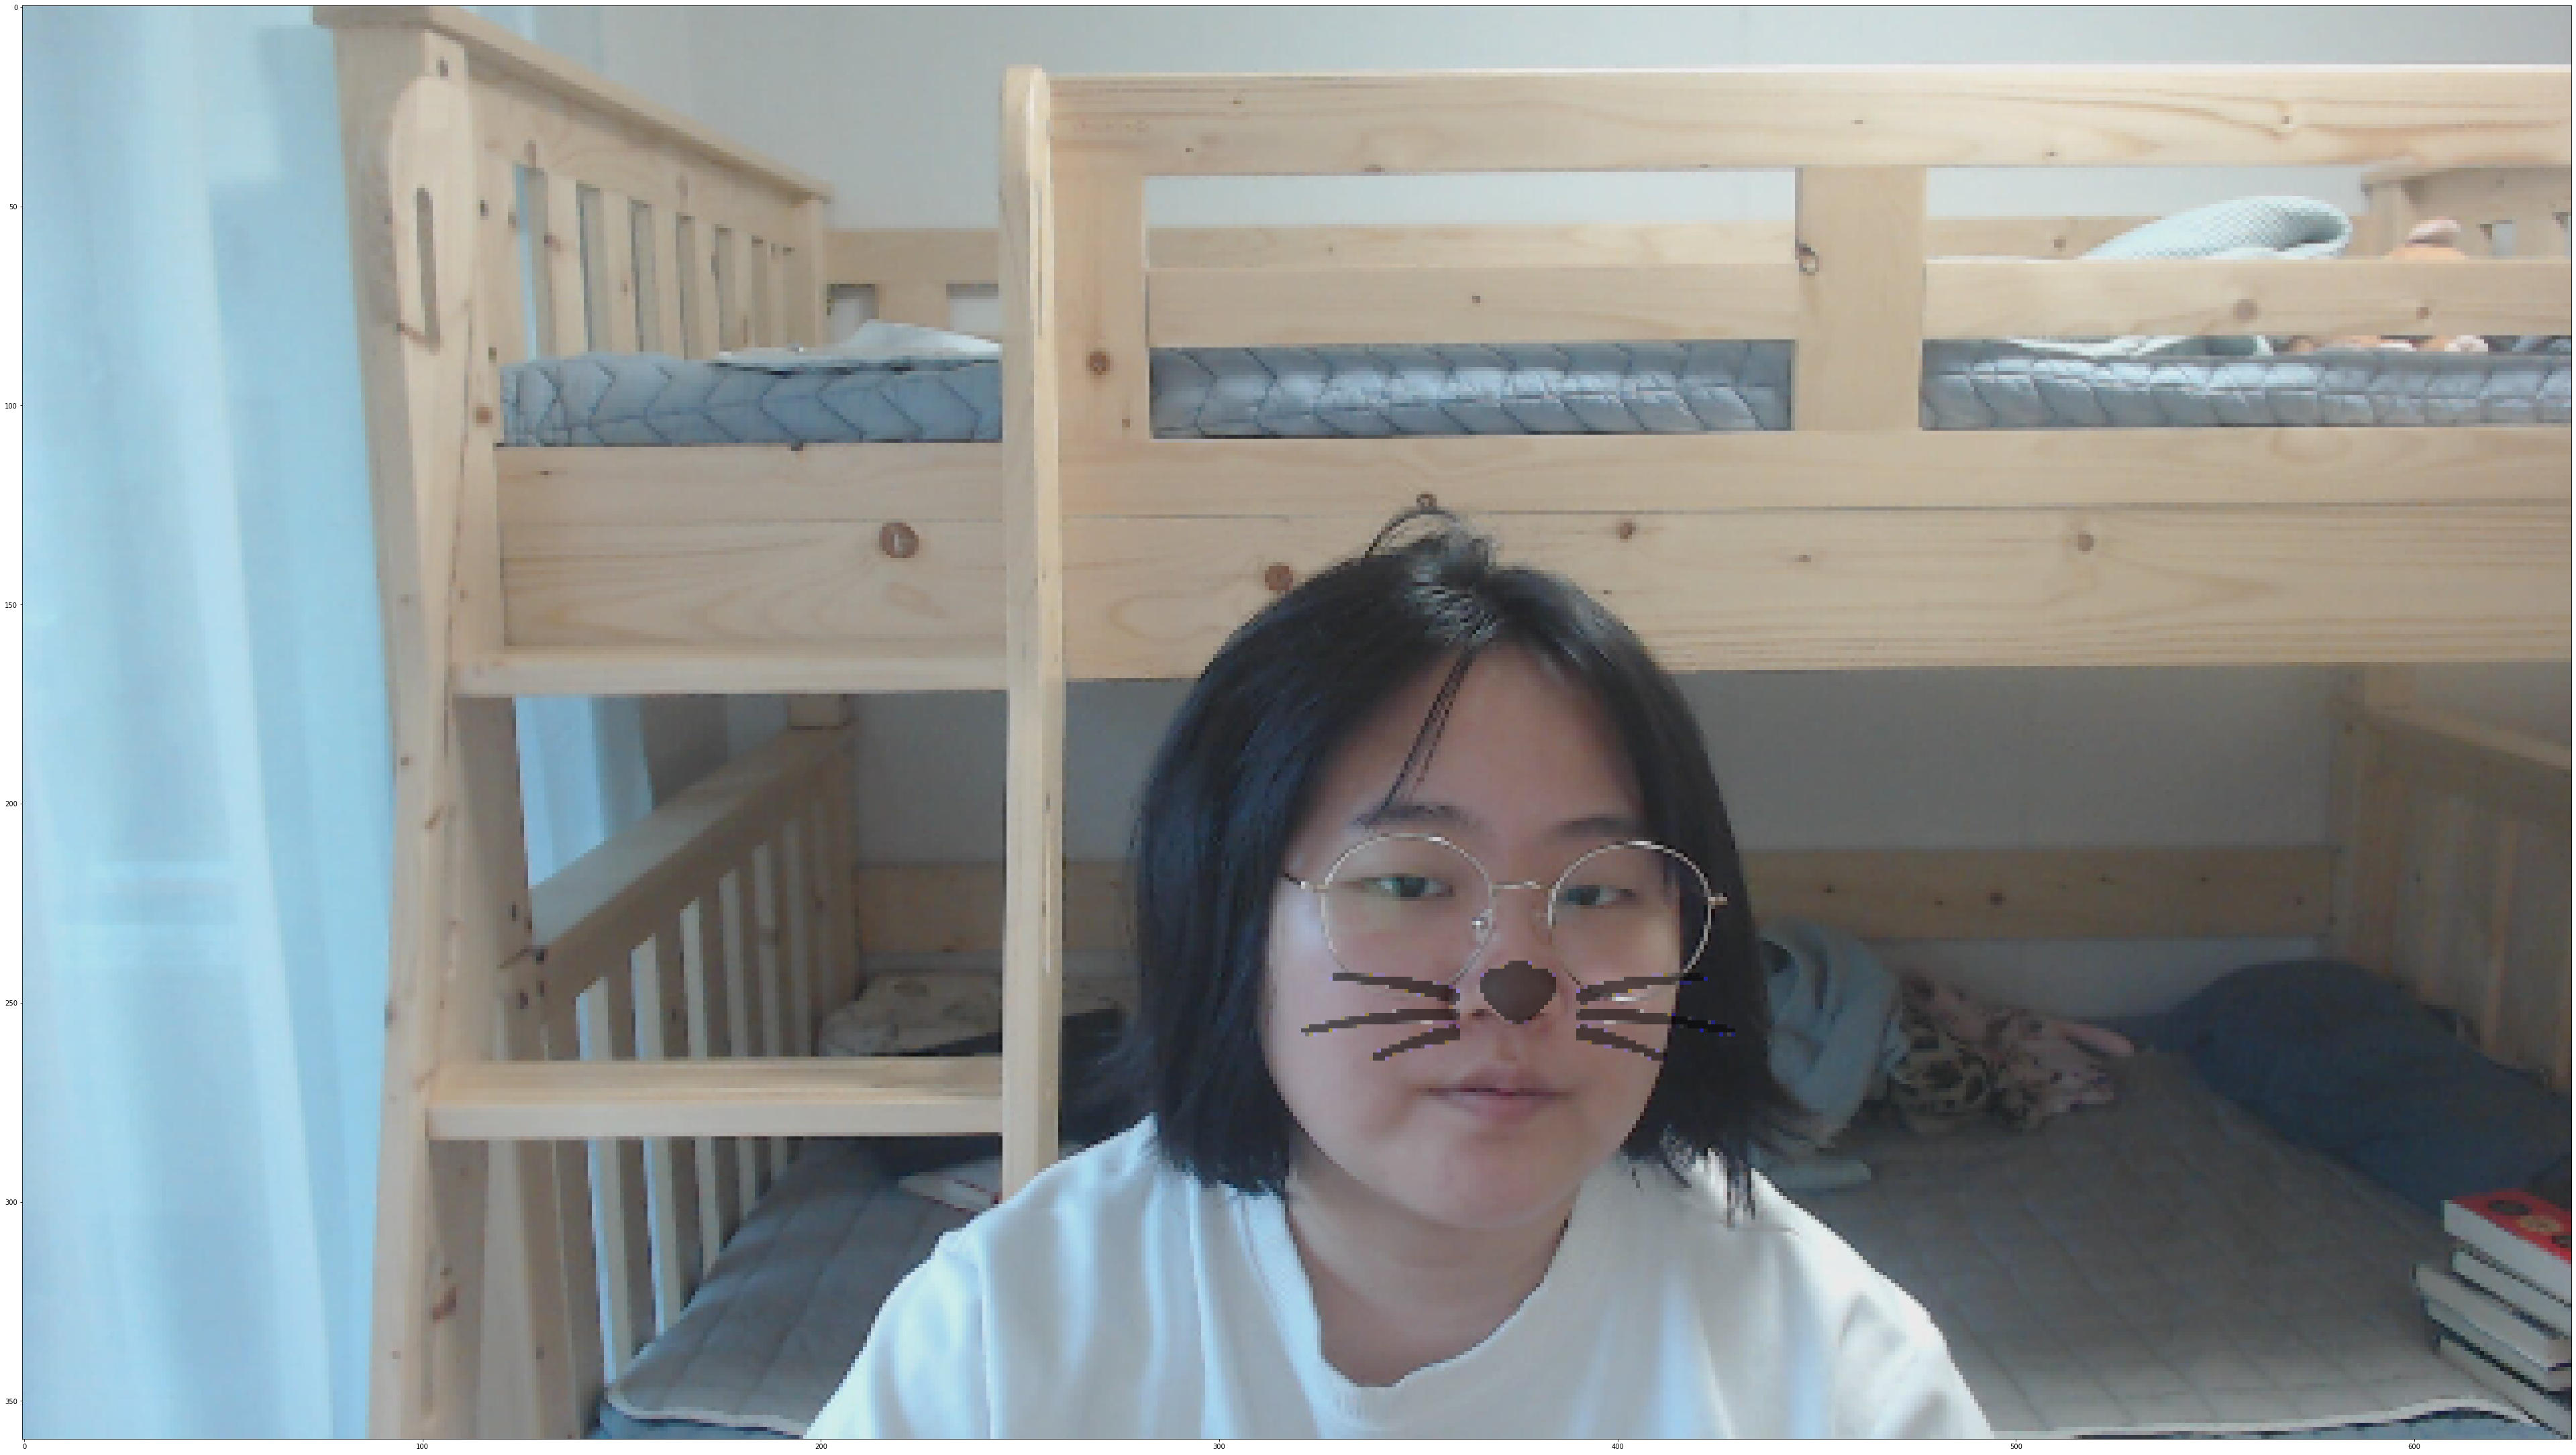

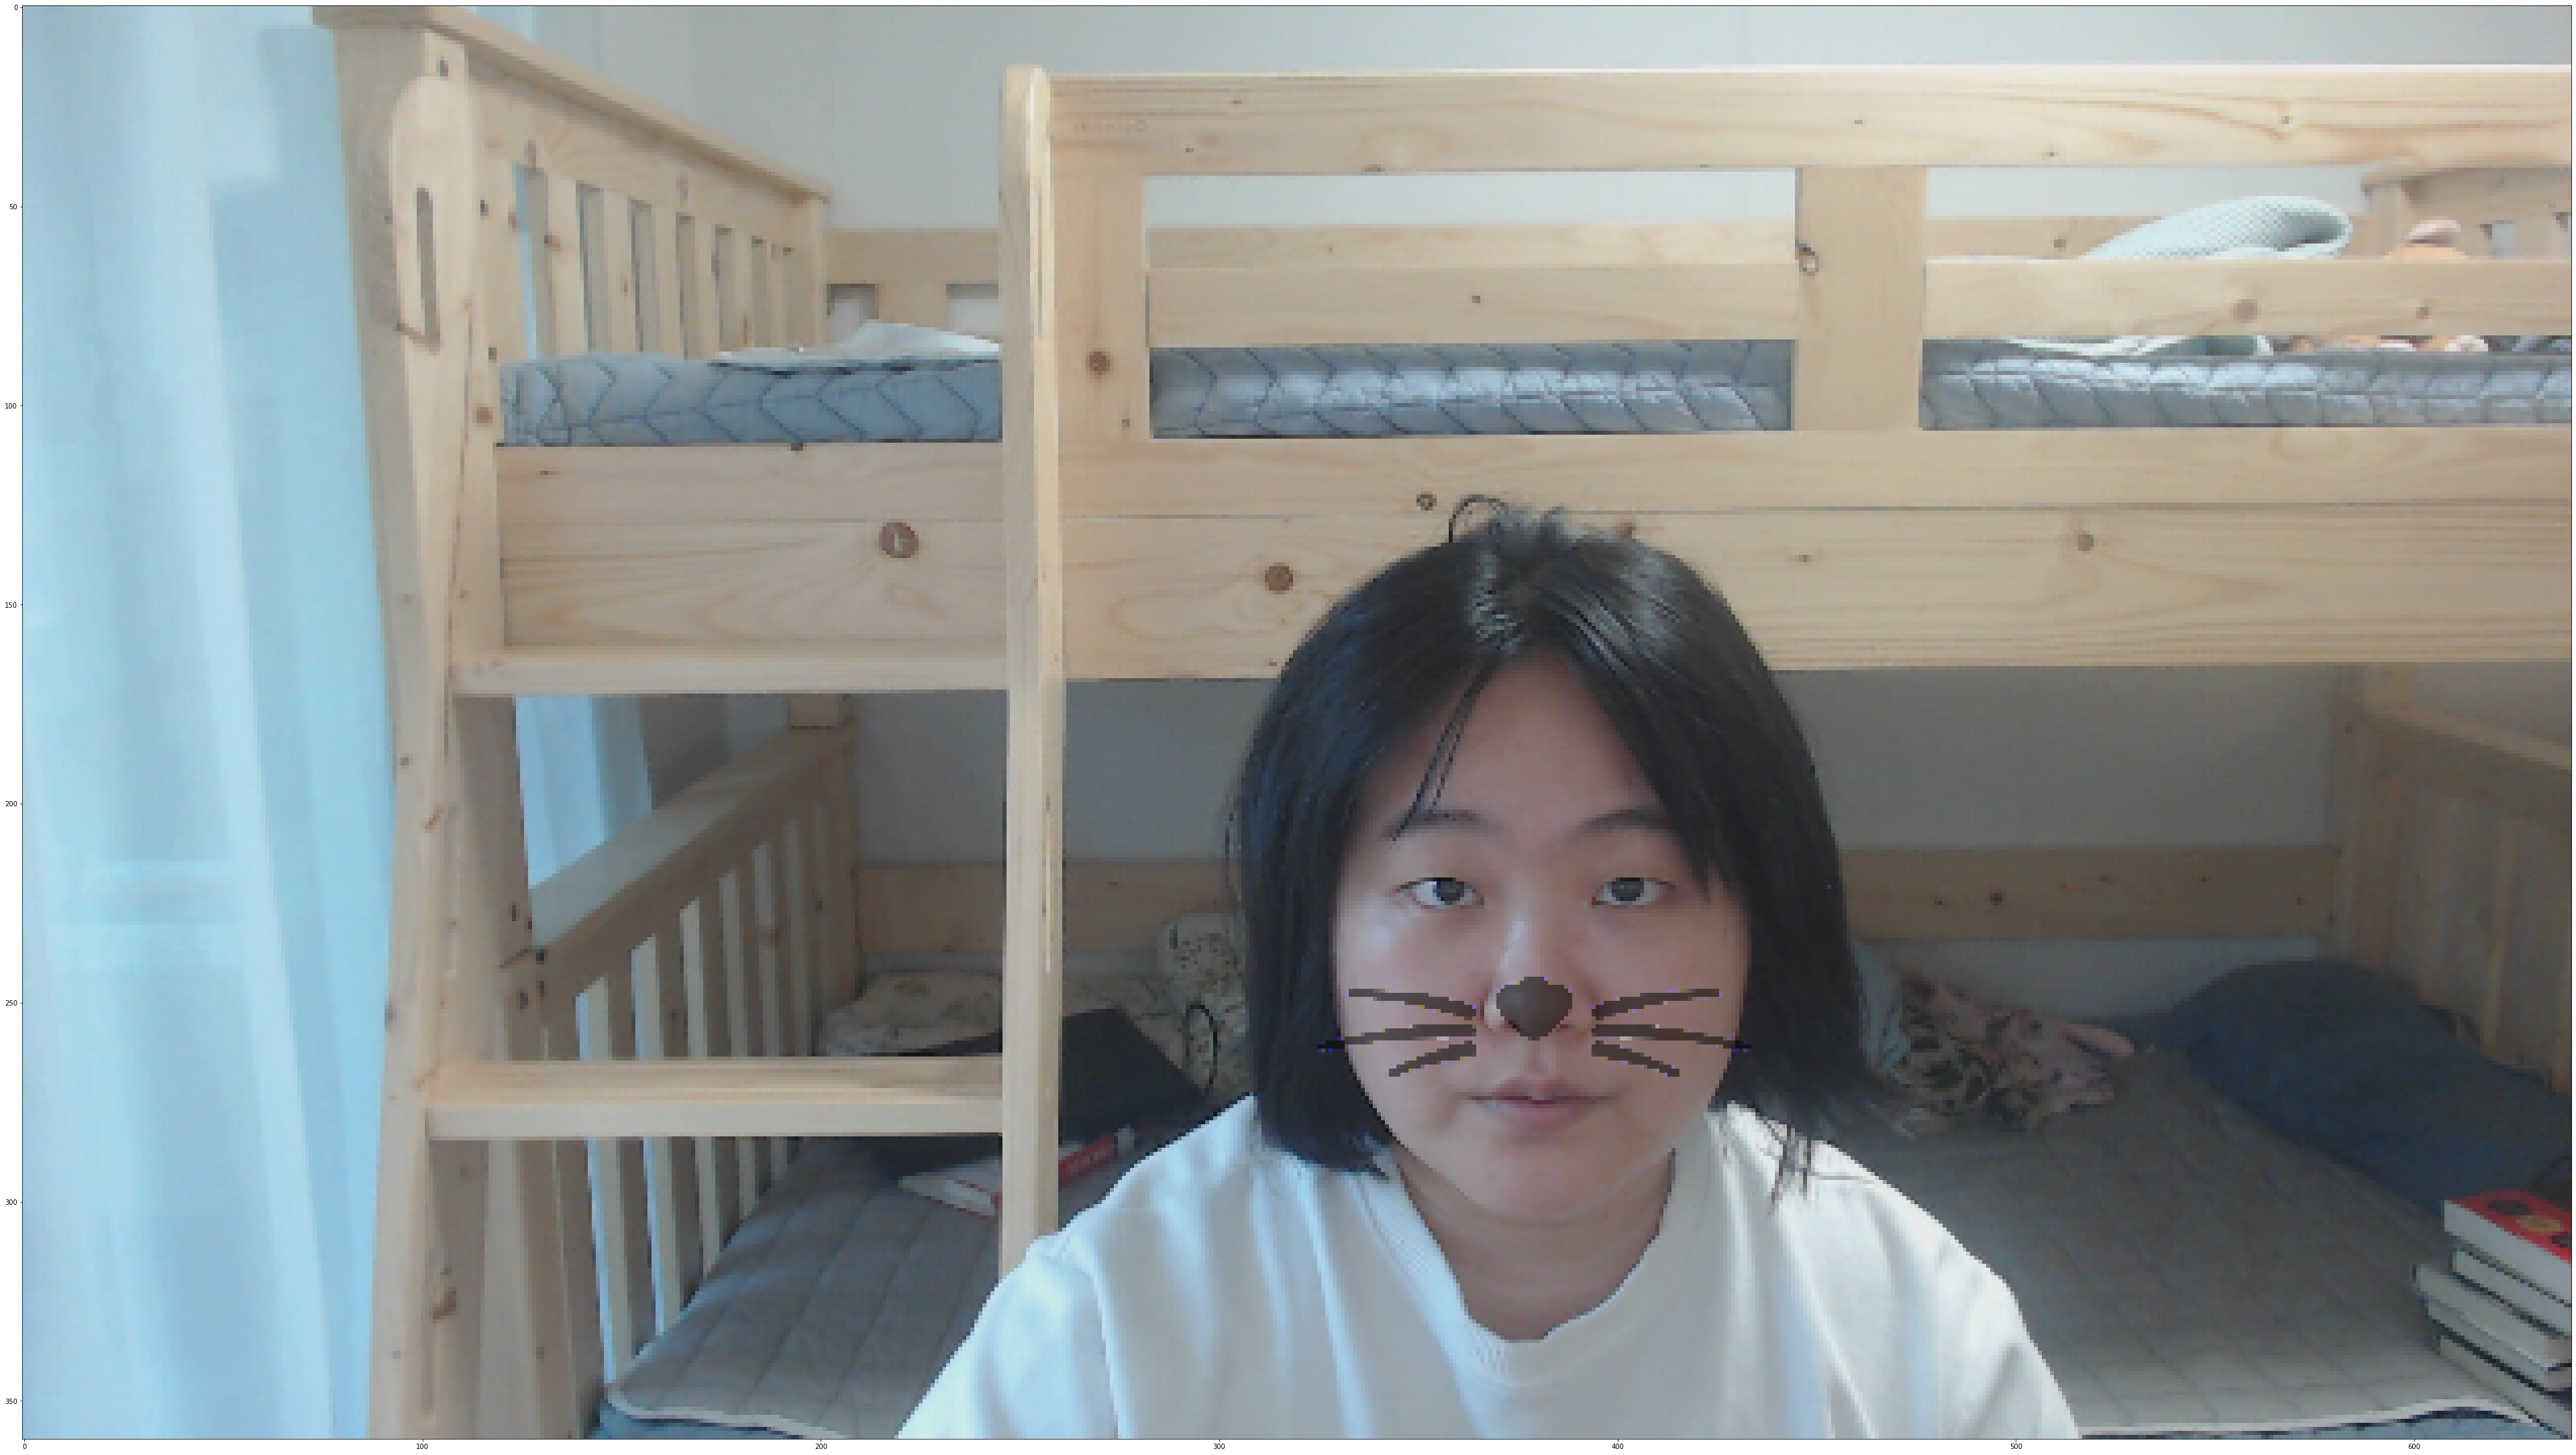

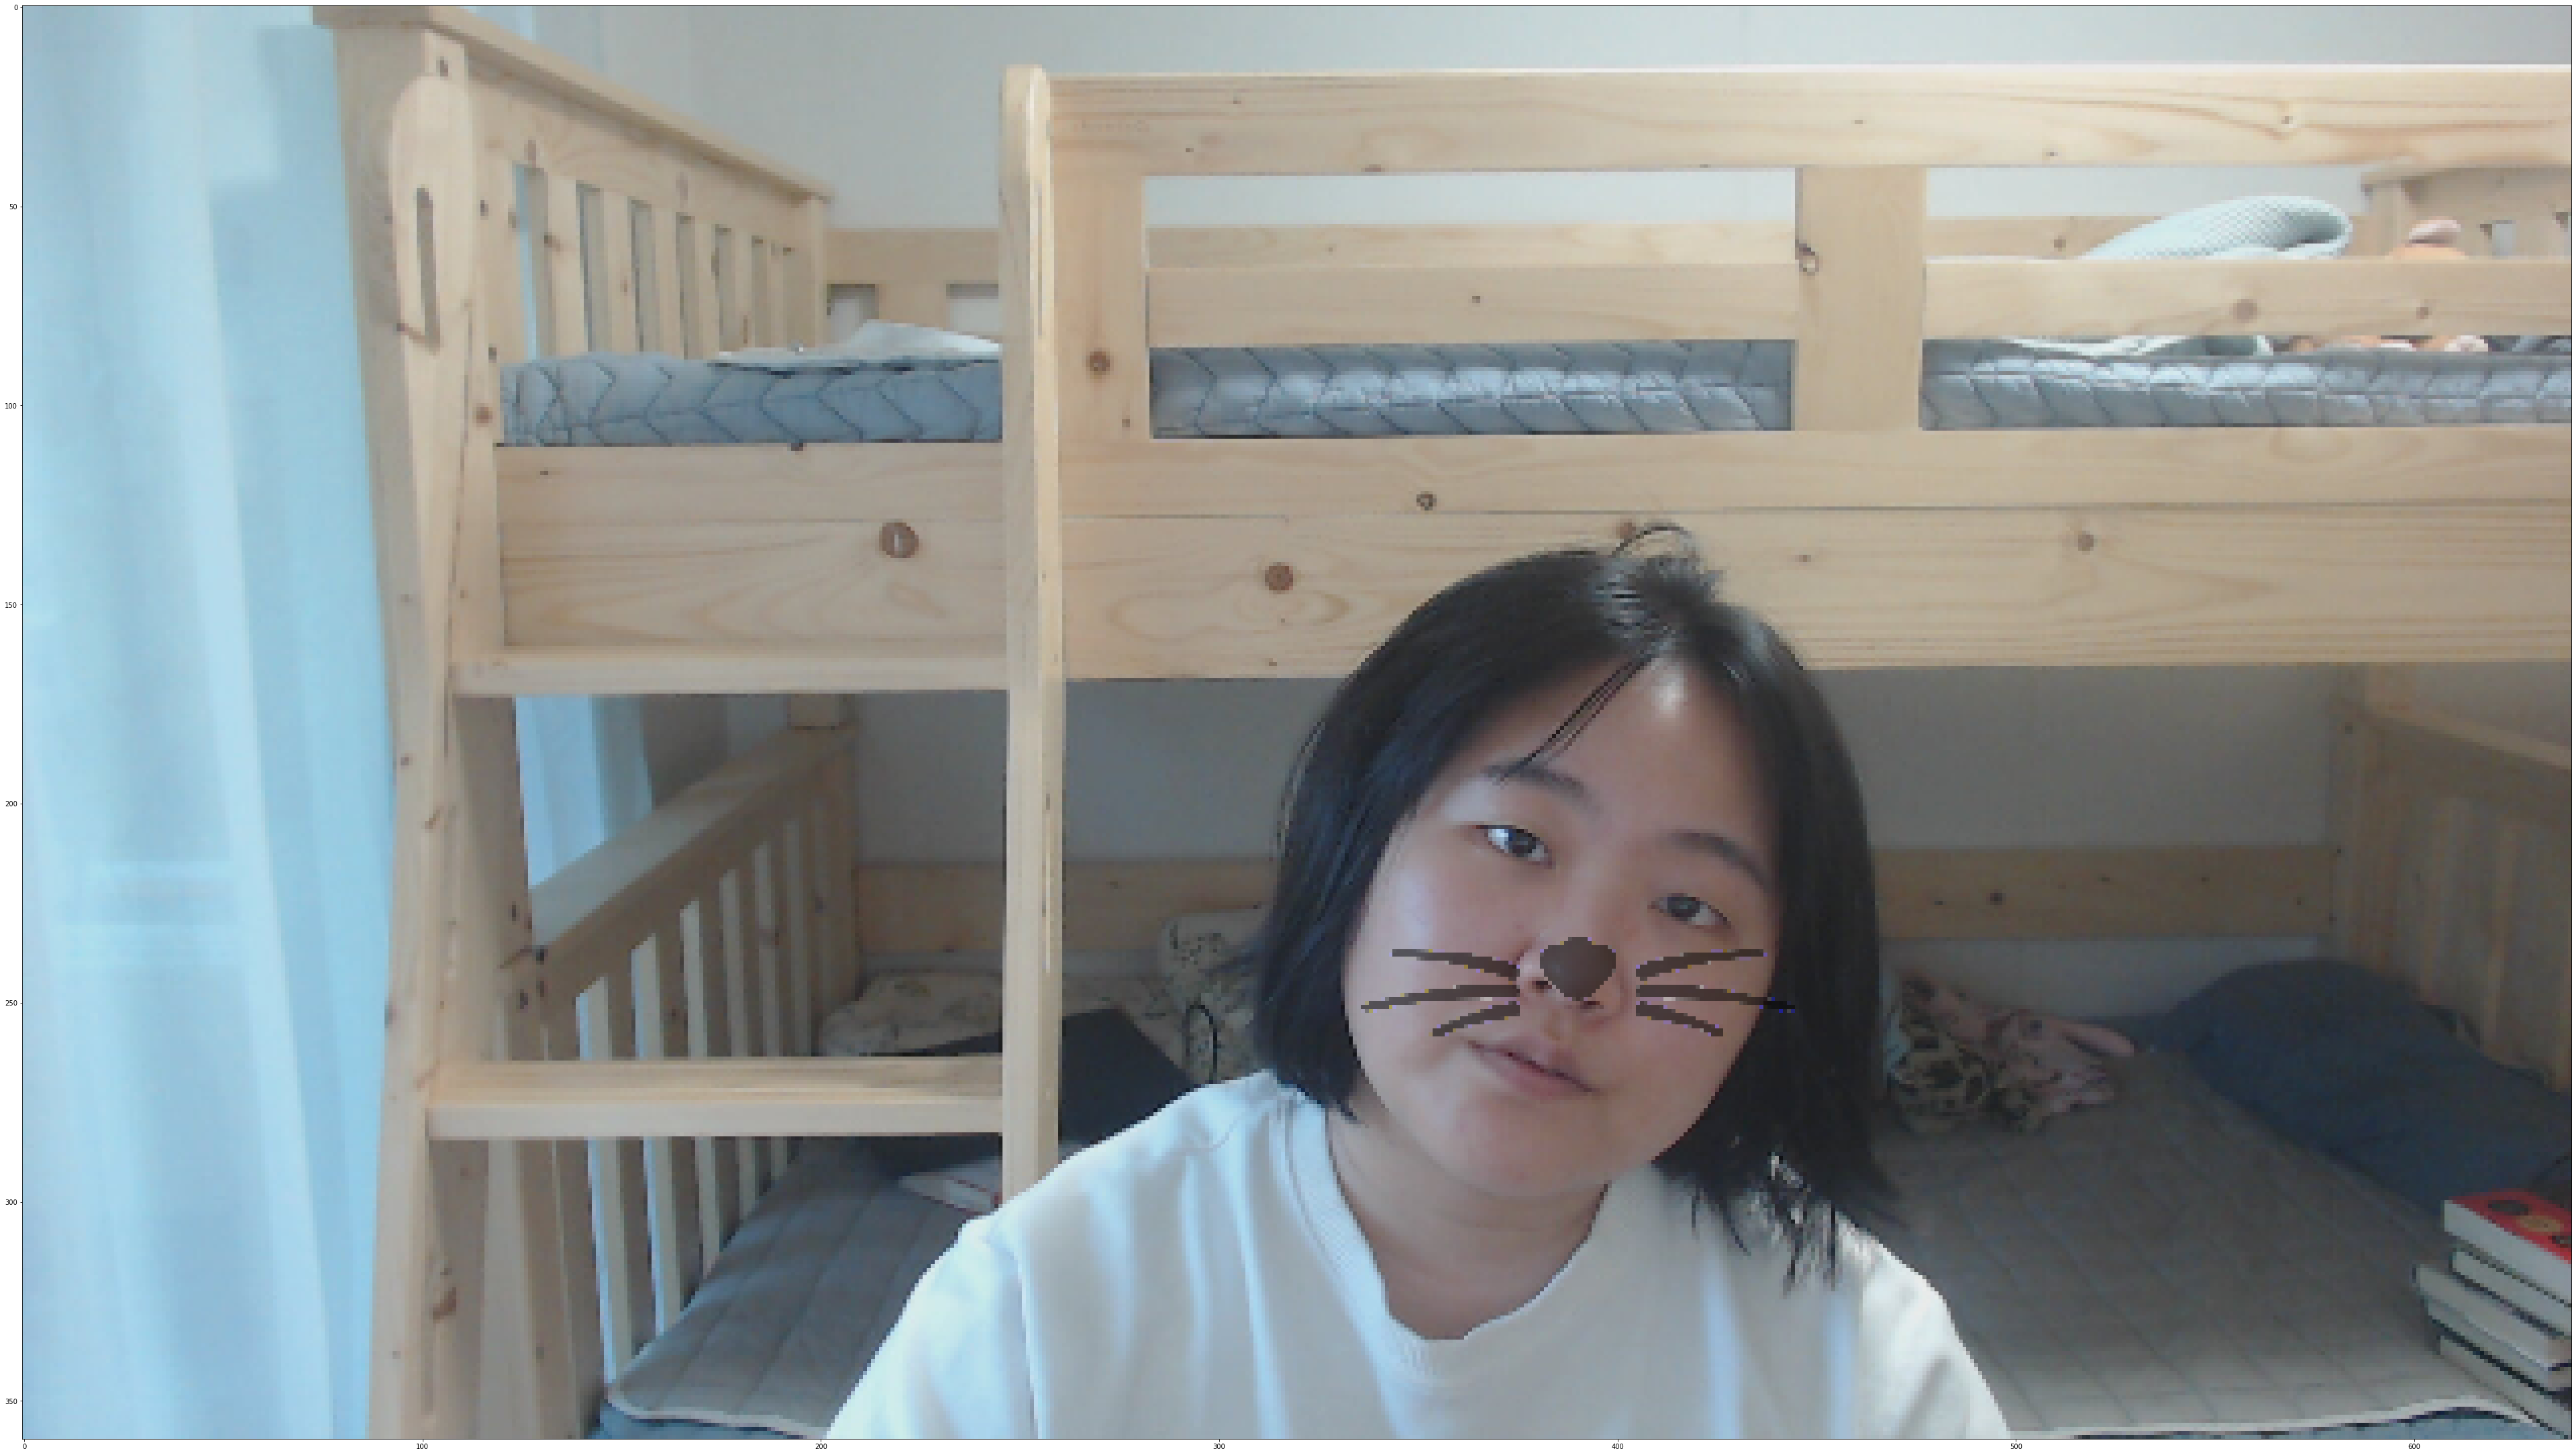

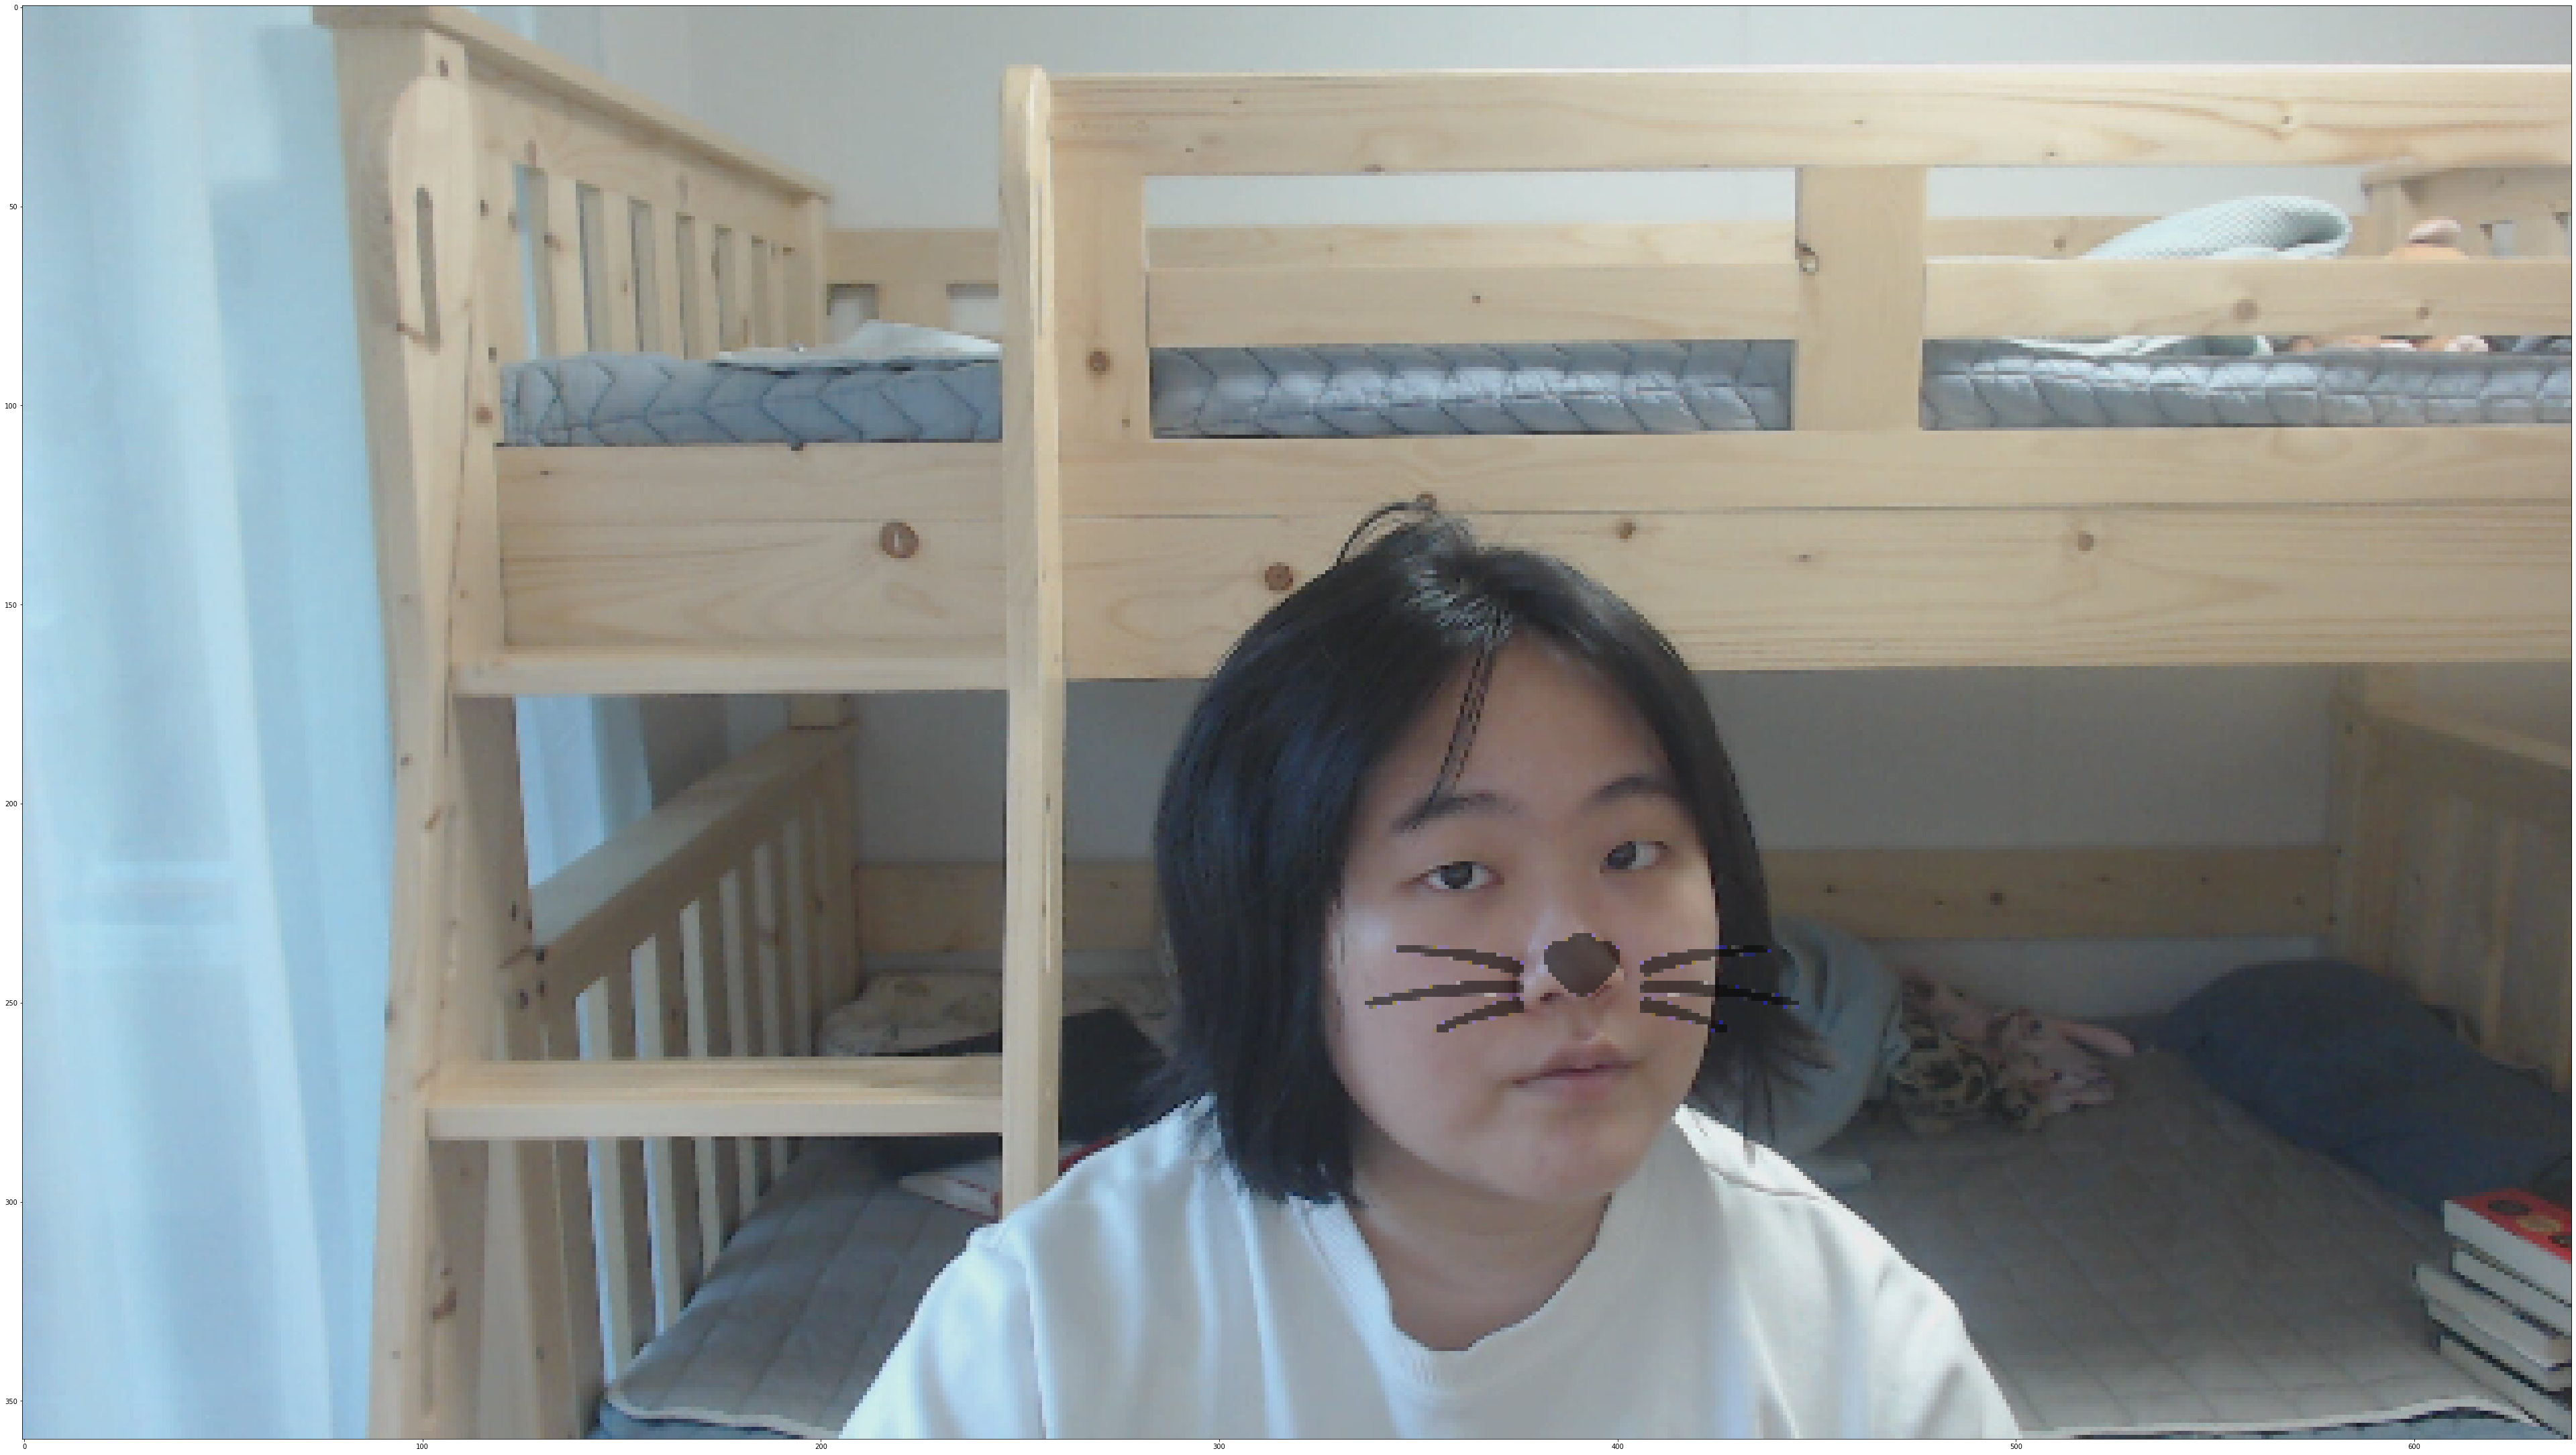

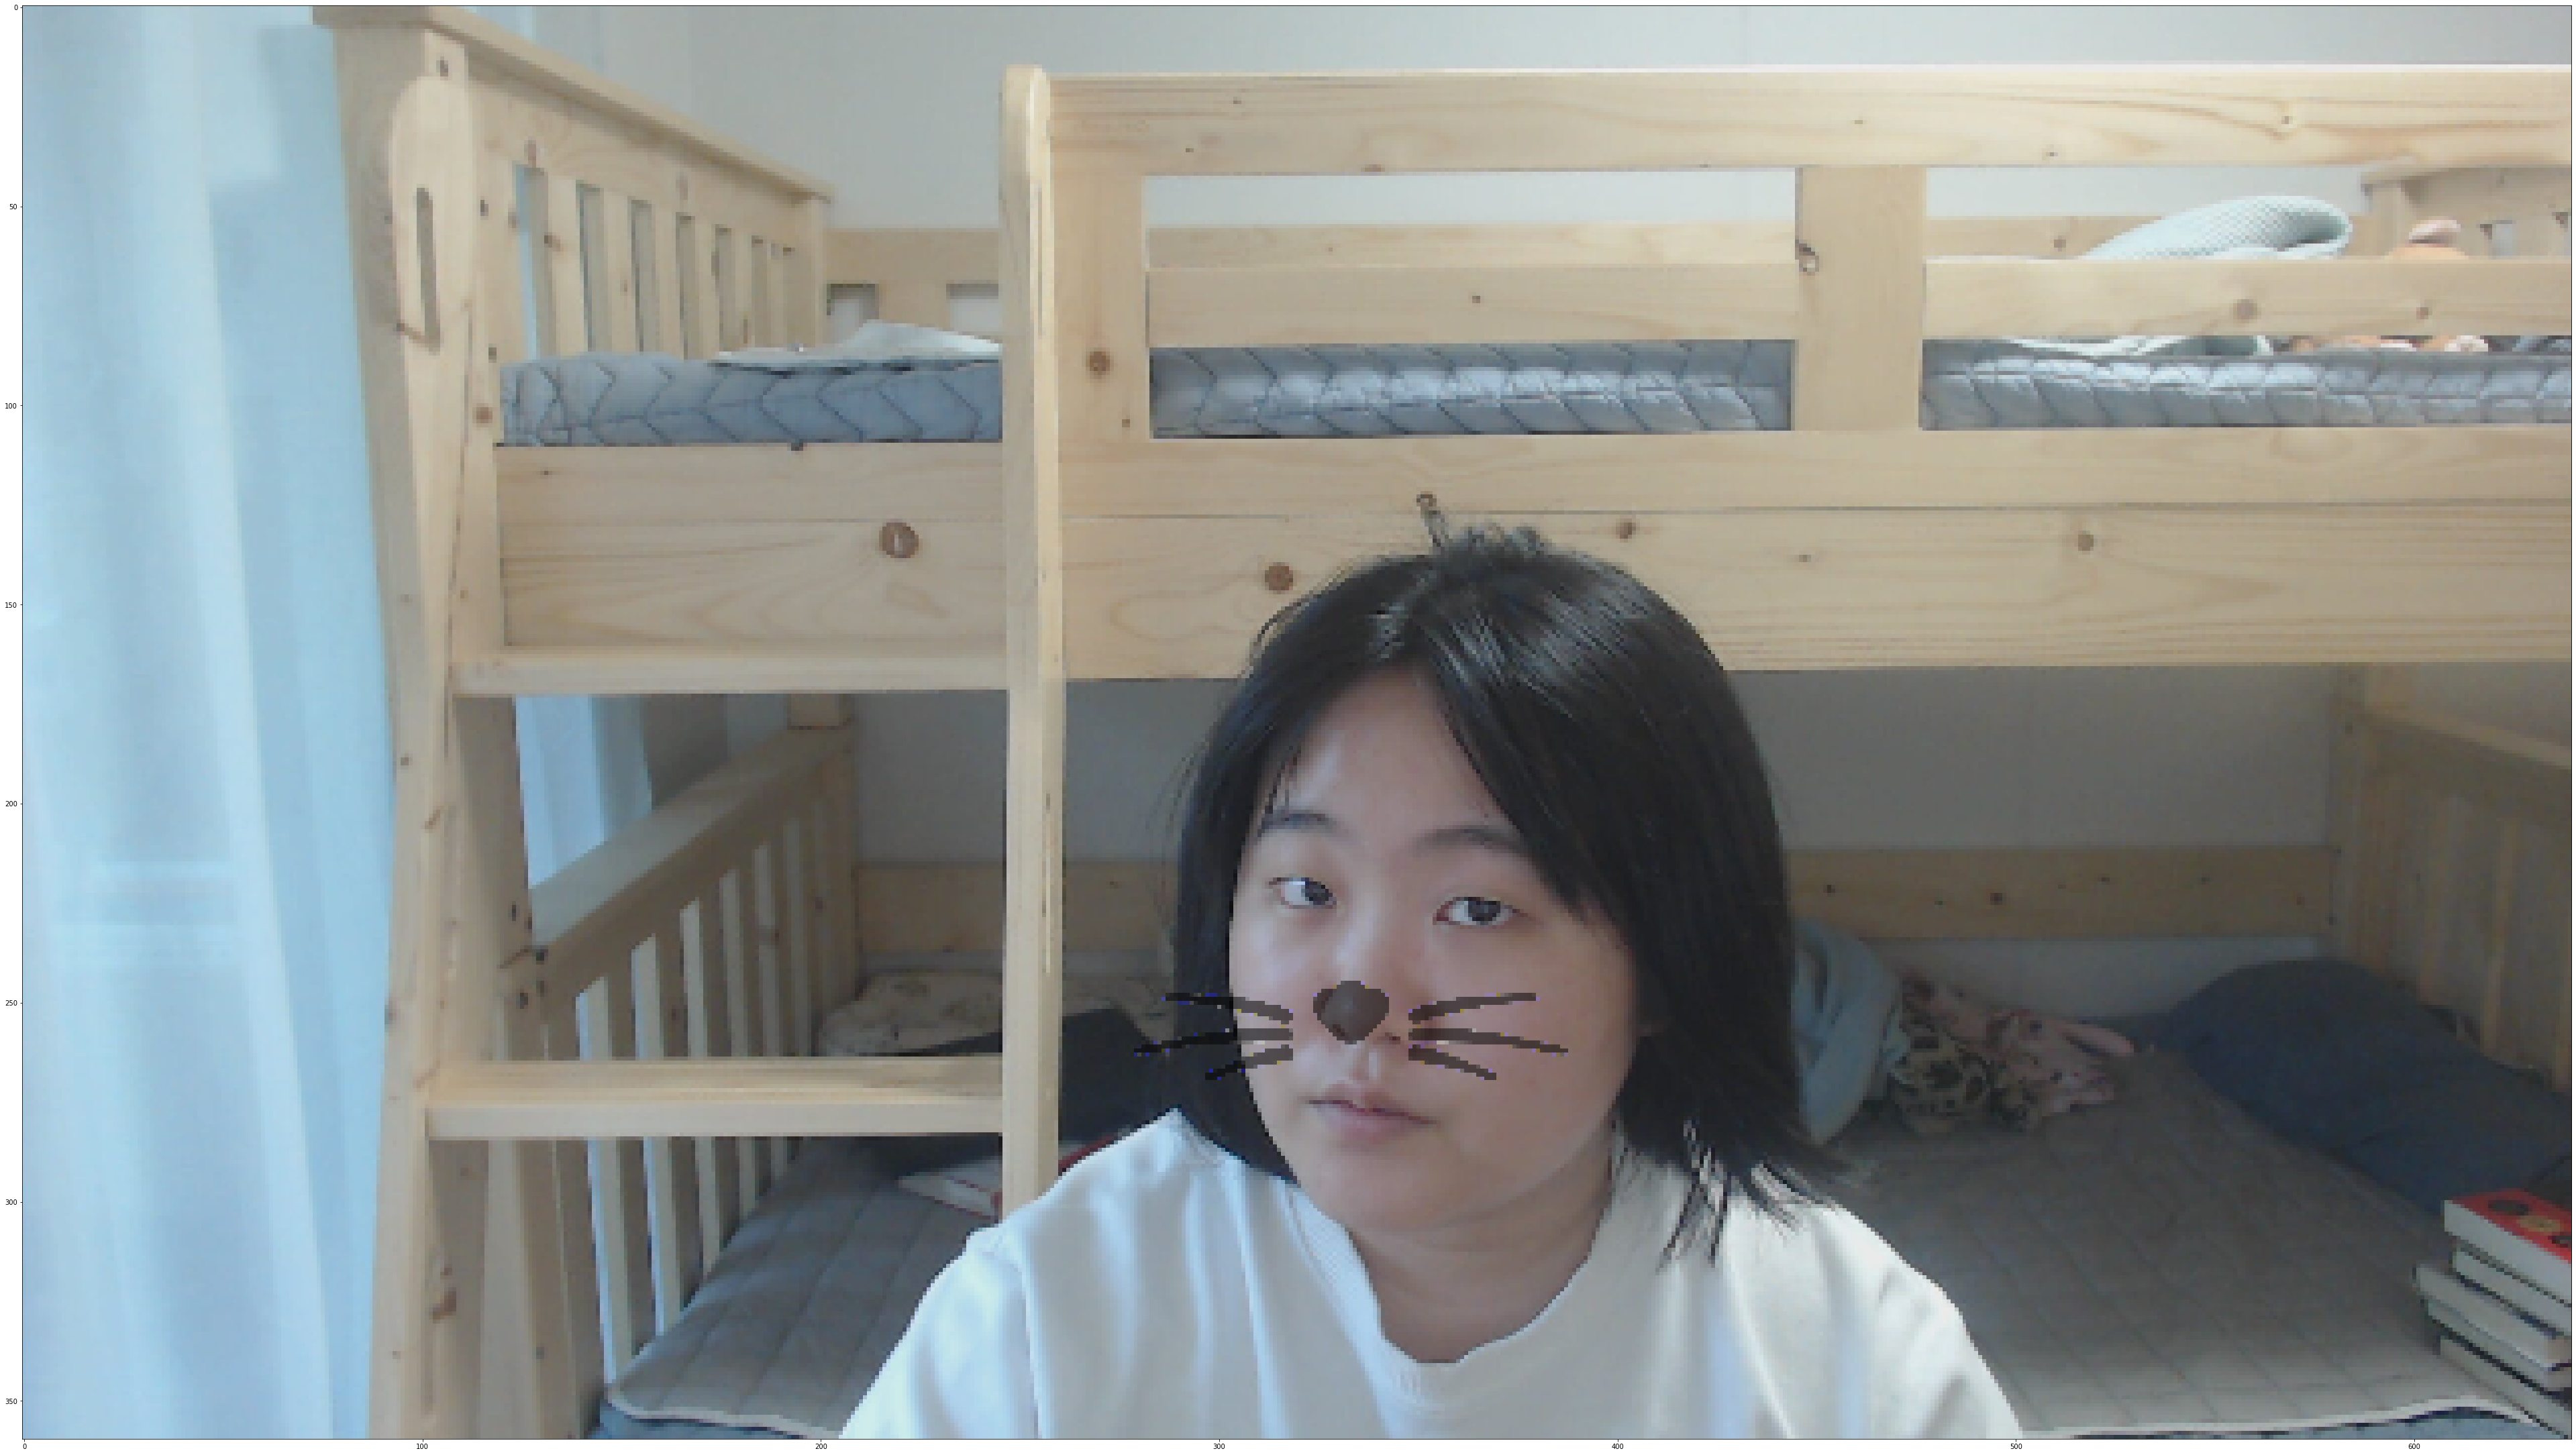

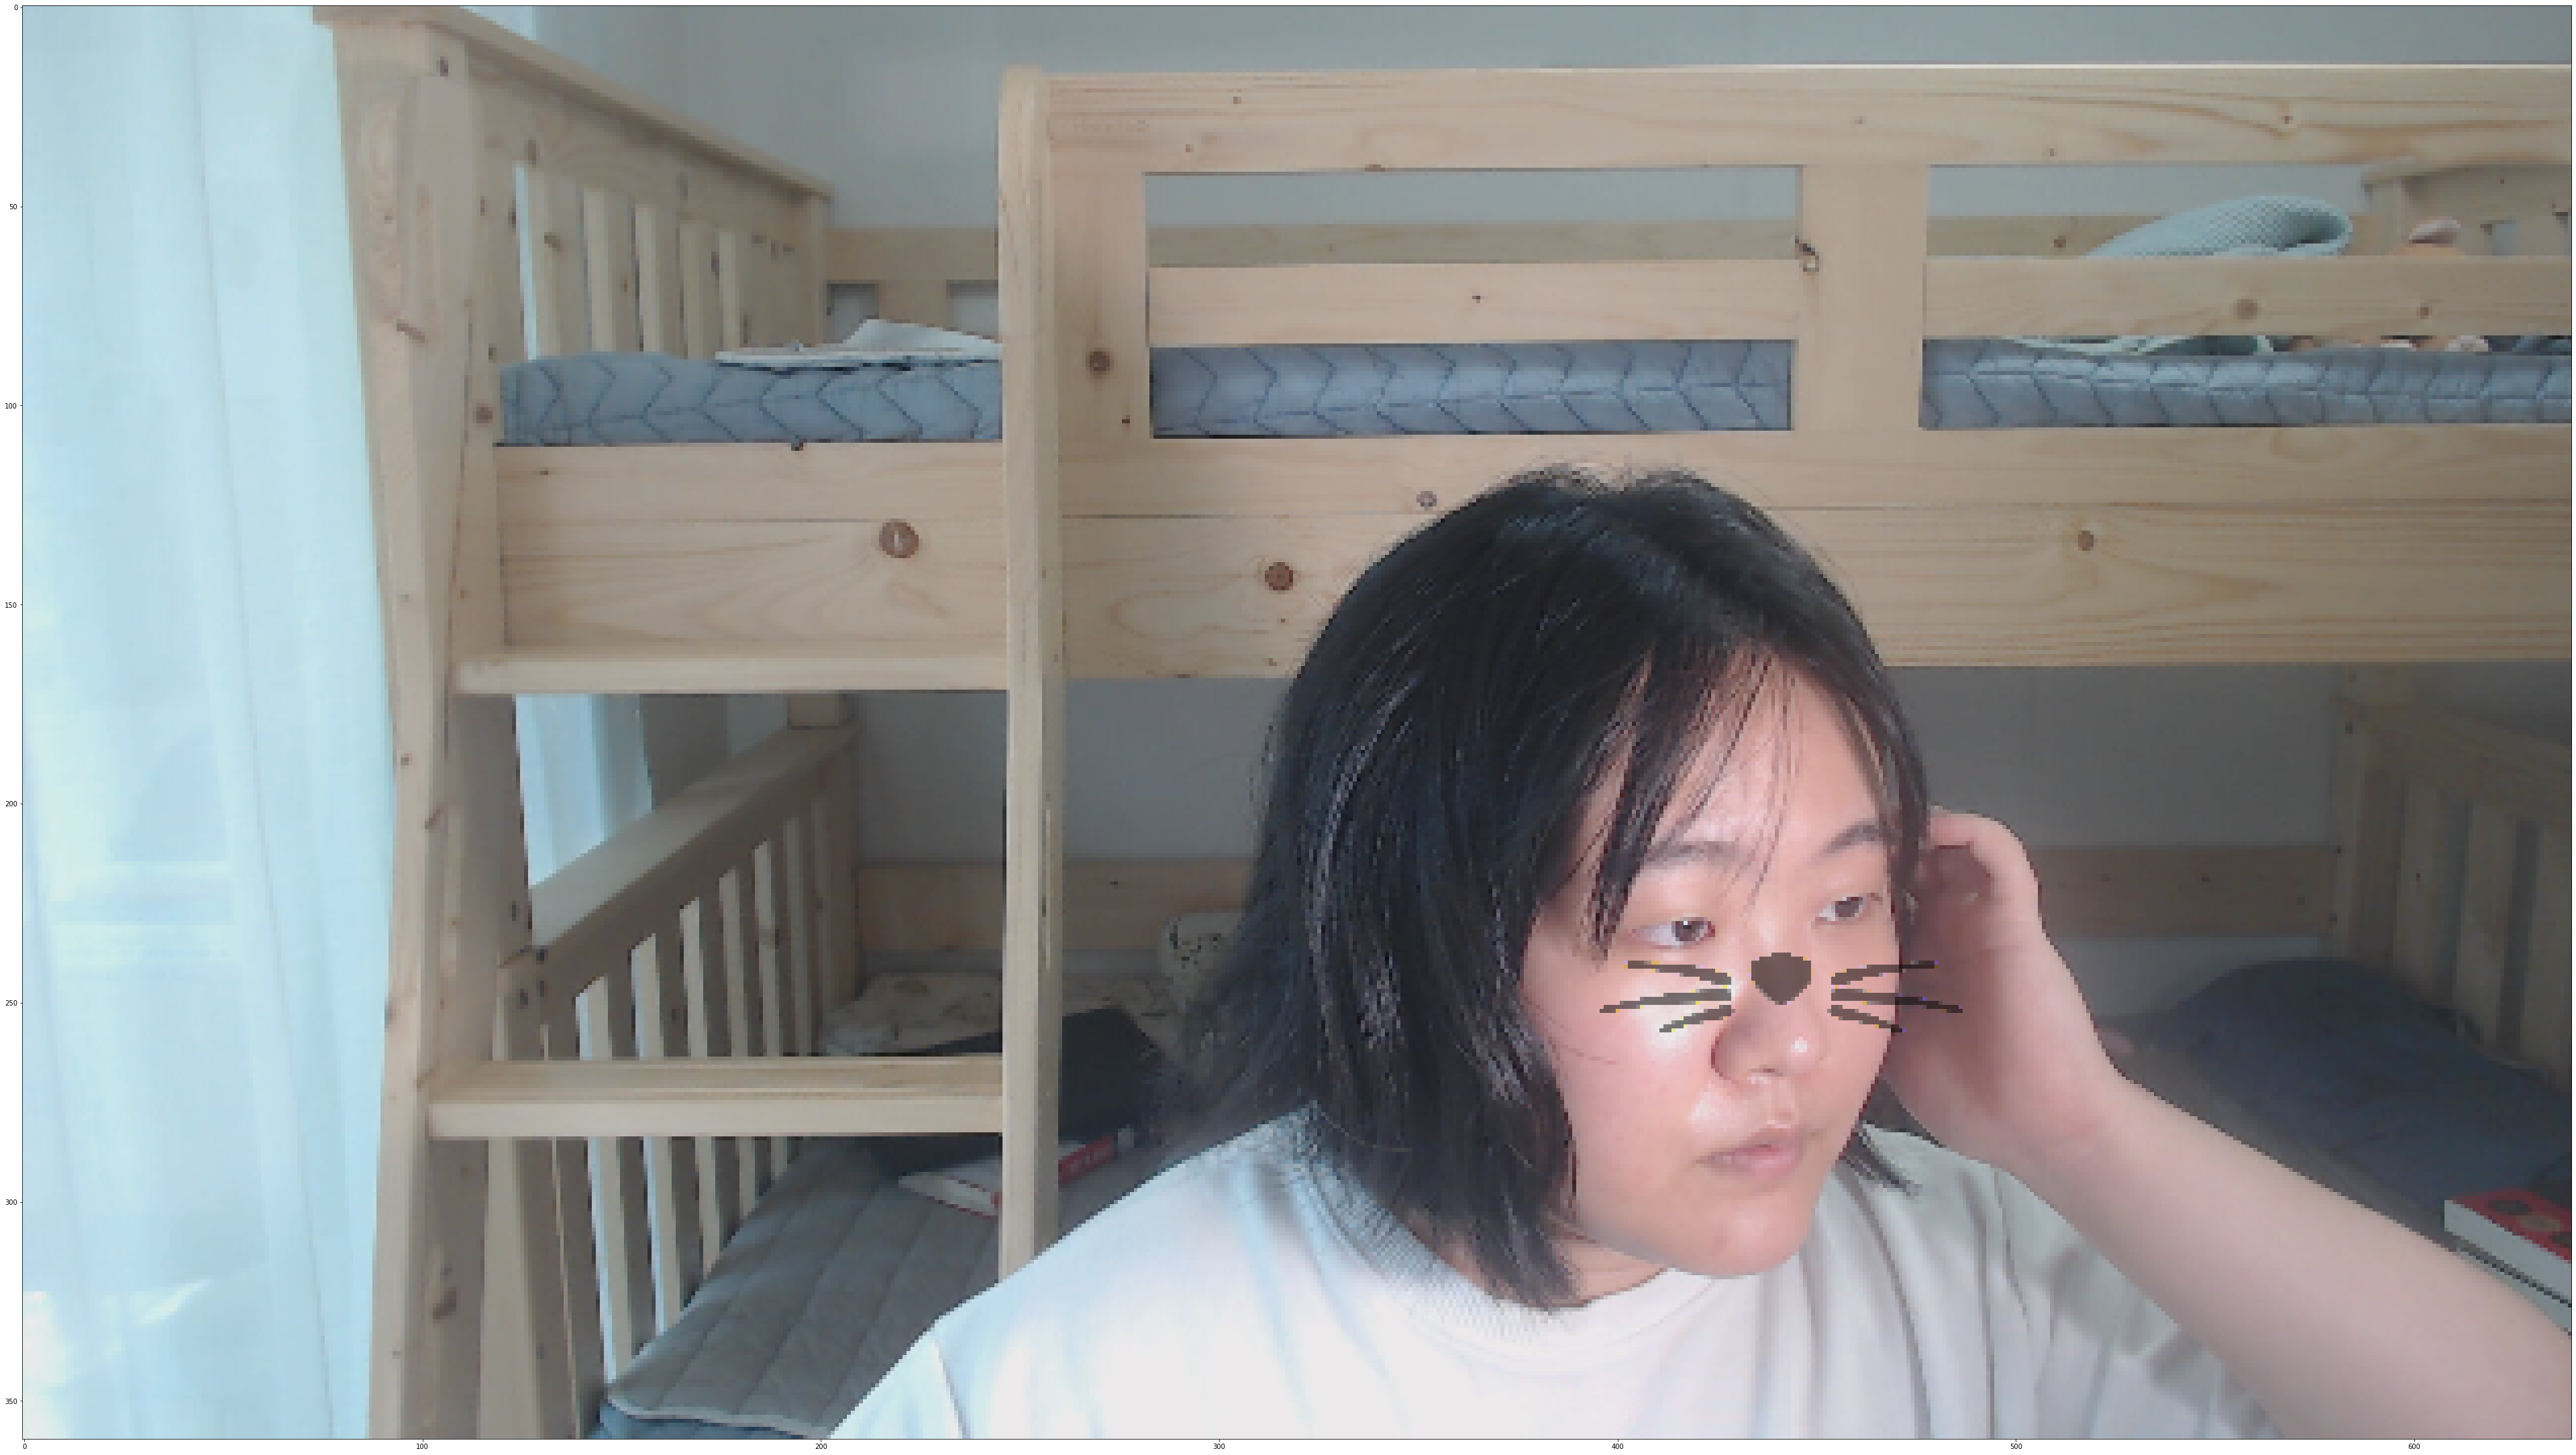

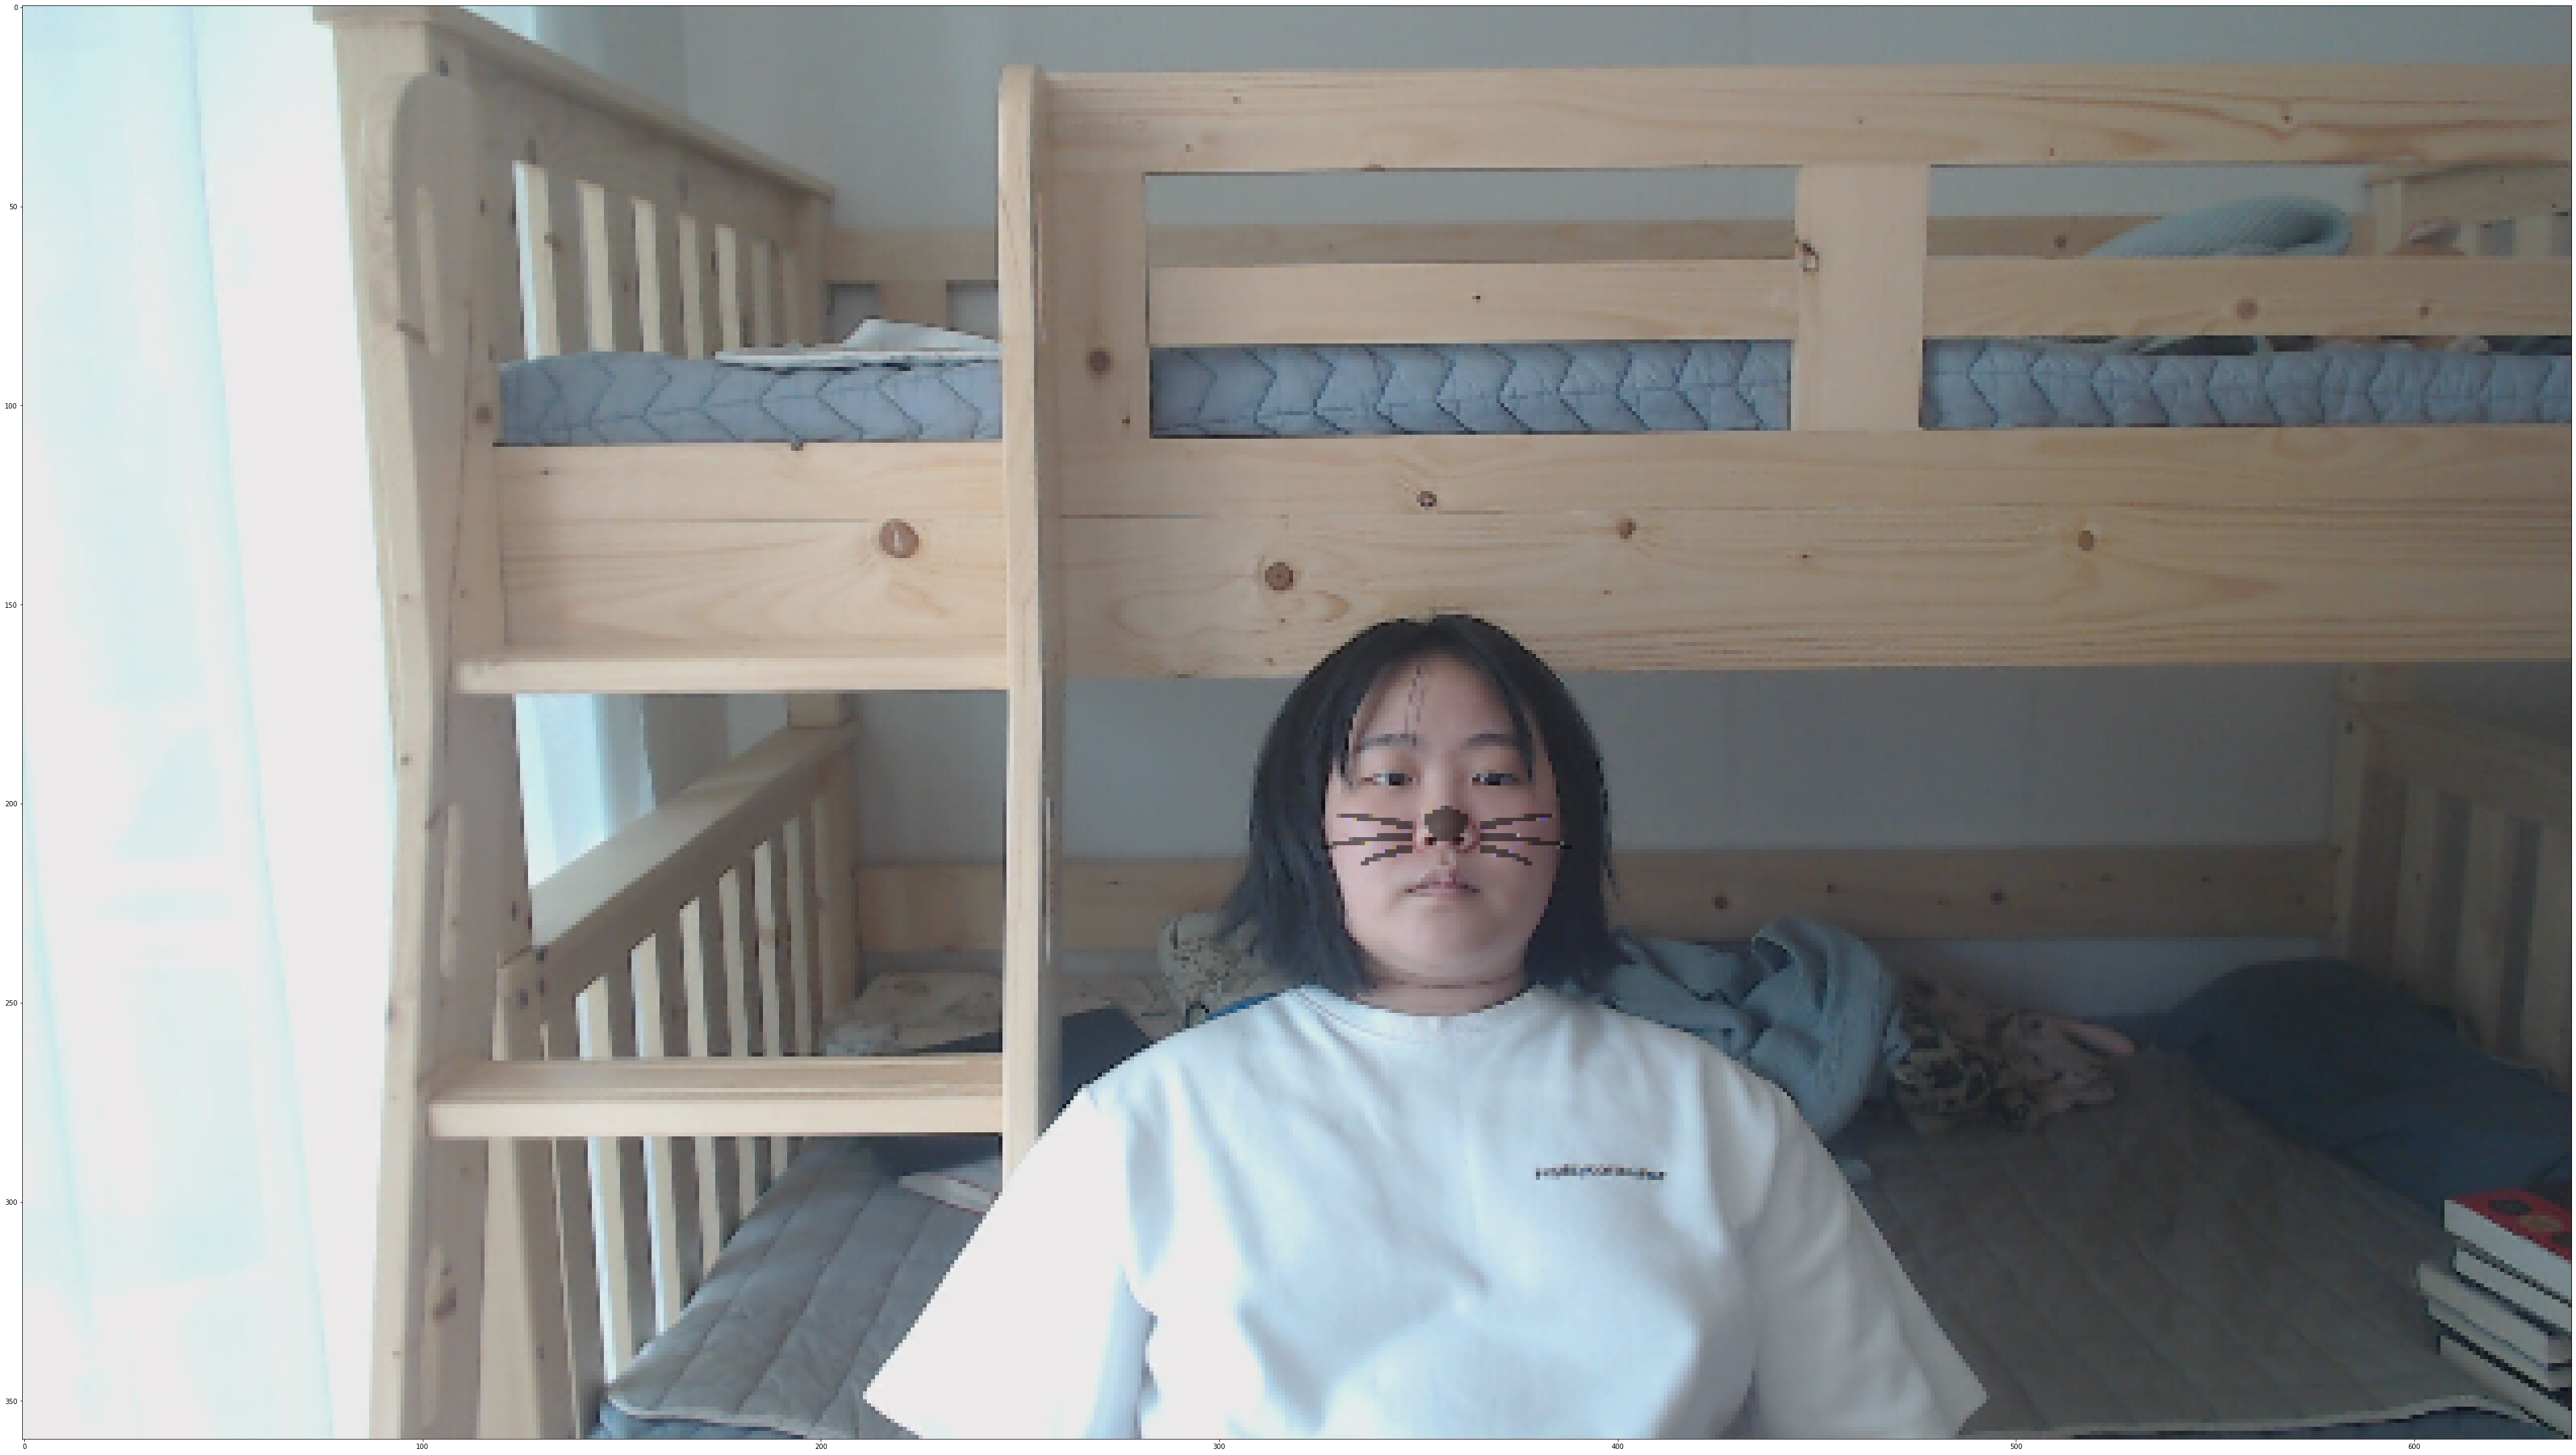

In [5]:
num_of_images = 8
detector_hog = dlib.get_frontal_face_detector()
dir_path = os.getenv('HOME')+'/AIFFEL/2021-09-30'
model_path = dir_path + '/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
sticker_path = dir_path + '/images/cat-whiskers.png'
results_path = dir_path + '/images/Results/'
for i in range(1, num_of_images+1):
    plt.figure(figsize=(640, 360))
    plt.subplot(1, num_of_images, i)
    image_path = dir_path + '/images/Webcam/photo'+str(i)+'.png'
    add_sticker(image_path, sticker_path, detector_hog, landmark_predictor, results_path)
